In [44]:
#________________________Import
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.ticker as mtick
import datetime
import yfinance as yf
import matplotlib.ticker as mtick
from sklearn.decomposition import PCA

In [45]:
# On crée une liste comprenant les tickers des sociétés que l'on souhaite analyser
symbols= ["MSFT", "AAPL", "ABNB", "SEDG", "TSLA", "META", "BAC", "PFE", "VZ", "KO","FIS", "CLF", "TWLO", "ILMN", "WMT", "ABBV", "SHEL", "MC.PA"]
start="2020-01-01"
end="2022-12-31"

# Import de données et conservation uniquement des prix à la cloture
data = yf.download(symbols, start = start, end = end)
prices = data["Close"]


# Liste cotenant les poids que l'on attribue à chaque actif/action du portefeuille 
weights = [0.1, 0.05, 0.125, 0.15, 0.05, 0.05, 0.05, 0.05, 0.0125, 0.0125, 0.1, 0.05, 0.0125, 0.015, 0.05, 0.0125, 0.05, 0.06]
print(sum(weights))

prices


[*********************100%***********************]  18 of 18 completed
1.0


,AAPL,ABBV,ABNB,BAC,CLF,FIS,ILMN,KO,MC.PA,META,MSFT,PFE,SEDG,SHEL,TSLA,TWLO,VZ,WMT
Date,,,,,,,,,,,,,,,,,,
2020-01-02,75.087502,89.550003,NaN,35.639999,7.840000,139.899994,327.000000,54.990002,419.149994,209.779999,160.619995,37.134724,101.809998,59.740002,28.684000,103.150002,61.049999,118.940002
2020-01-03,74.357498,88.699997,NaN,34.900002,7.820000,139.020004,322.730011,54.689999,419.100006,208.669998,158.619995,36.935486,102.379997,60.209999,29.534000,103.519997,60.400002,117.889999
2020-01-06,74.949997,89.400002,NaN,34.849998,7.790000,140.350006,325.529999,54.669998,415.149994,212.600006,159.029999,36.888046,99.629997,60.959999,30.102667,107.459999,60.270000,117.650002
2020-01-07,74.597504,88.889999,NaN,34.619999,8.000000,138.190002,329.690002,54.250000,416.000000,213.059998,157.580002,36.764706,101.790001,60.400002,31.270666,108.059998,59.599998,116.559998
2020-01-08,75.797501,89.519997,NaN,34.970001,7.930000,140.220001,332.160004,54.349998,418.799988,215.220001,160.089996,37.058823,104.160004,59.689999,32.809334,109.389999,59.709999,116.160004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.860001,163.100006,85.250000,32.470001,16.900000,66.919998,191.240005,63.820000,673.799988,118.040001,238.729996,51.830002,310.149994,57.779999,123.150002,44.750000,38.410000,143.770004
2022-12-27,130.029999,162.990005,83.489998,32.529999,17.320000,67.269997,188.770004,64.209999,690.200012,116.879997,236.960007,51.130001,293.040009,57.869999,109.099998,44.590000,39.250000,143.809998
2022-12-28,126.040001,162.229996,82.489998,32.770000,16.250000,66.550003,190.809998,63.570000,686.599976,115.620003,234.529999,50.799999,275.839996,56.560001,112.709999,45.290001,38.810001,141.289993


In [46]:
def analysePCA(prices, weights) : 

    """
    prices (dataframe) : dataframe contenant les prix de chaque action sur la période
    weights (list) : liste de poids de chaque action du portefeuille
    """

    # Analyse en composante principale :
    # L'analyse en composante principale est une méthode de réduction de dimension.
    # Dans le cas présent, elle nous permet d'expliquer à quel pourcentage la variance d'un jeu de donnée peut être expliquée par un facteur. 
    # Cette analyse peut se revéler utile puisque la performance d'un portefeuille actions est souvent expliquée par plusieurs facteurs (beta, facteur des actions, contexte macroéconomique...)

    # Utilisation de la contribution à la variance du portefeuille par facteur 
    df_portfolio_prices_weighted = prices*weights
    df_portfolio_contributions = (df_portfolio_prices_weighted/df_portfolio_prices_weighted.shift(1) -1)*100
    df_portfolio_contributions = df_portfolio_contributions.dropna()

    # Nombre de composantes que l'on souhaite obtenir (la variance est généralement expliquée en majorité par quelques composantes)
    pca = PCA(n_components=5)
    pca.fit(df_portfolio_contributions)
    pct = pca.explained_variance_ratio_
    pca_components = pca.components_

    # Graphique 
    cum_pct = np.cumsum(pct)
    x = np.arange(1,len(pct)+1,1)

    plt.figure(figsize=(30, 15), dpi=100)

    plt.subplot(1,2,1)
    plt.bar(x, pct * 100, align="center")
    plt.title("Contribution à la volatilité (en %)")
    plt.xlabel("Composantes")
    plt.xticks(x)
    plt.xlim([0,6])
    plt.ylim([0,50])

    plt.subplot(1,2,2)
    plt.plot(x, cum_pct * 100, "r^-")
    plt.title("Contribution à la volatilité cumulée (en %)")
    plt.xlabel("Composantes")
    plt.xticks(x)
    plt.xlim([0,6])
    plt.ylim([0,100])

    return df_portfolio_contributions, pca_components



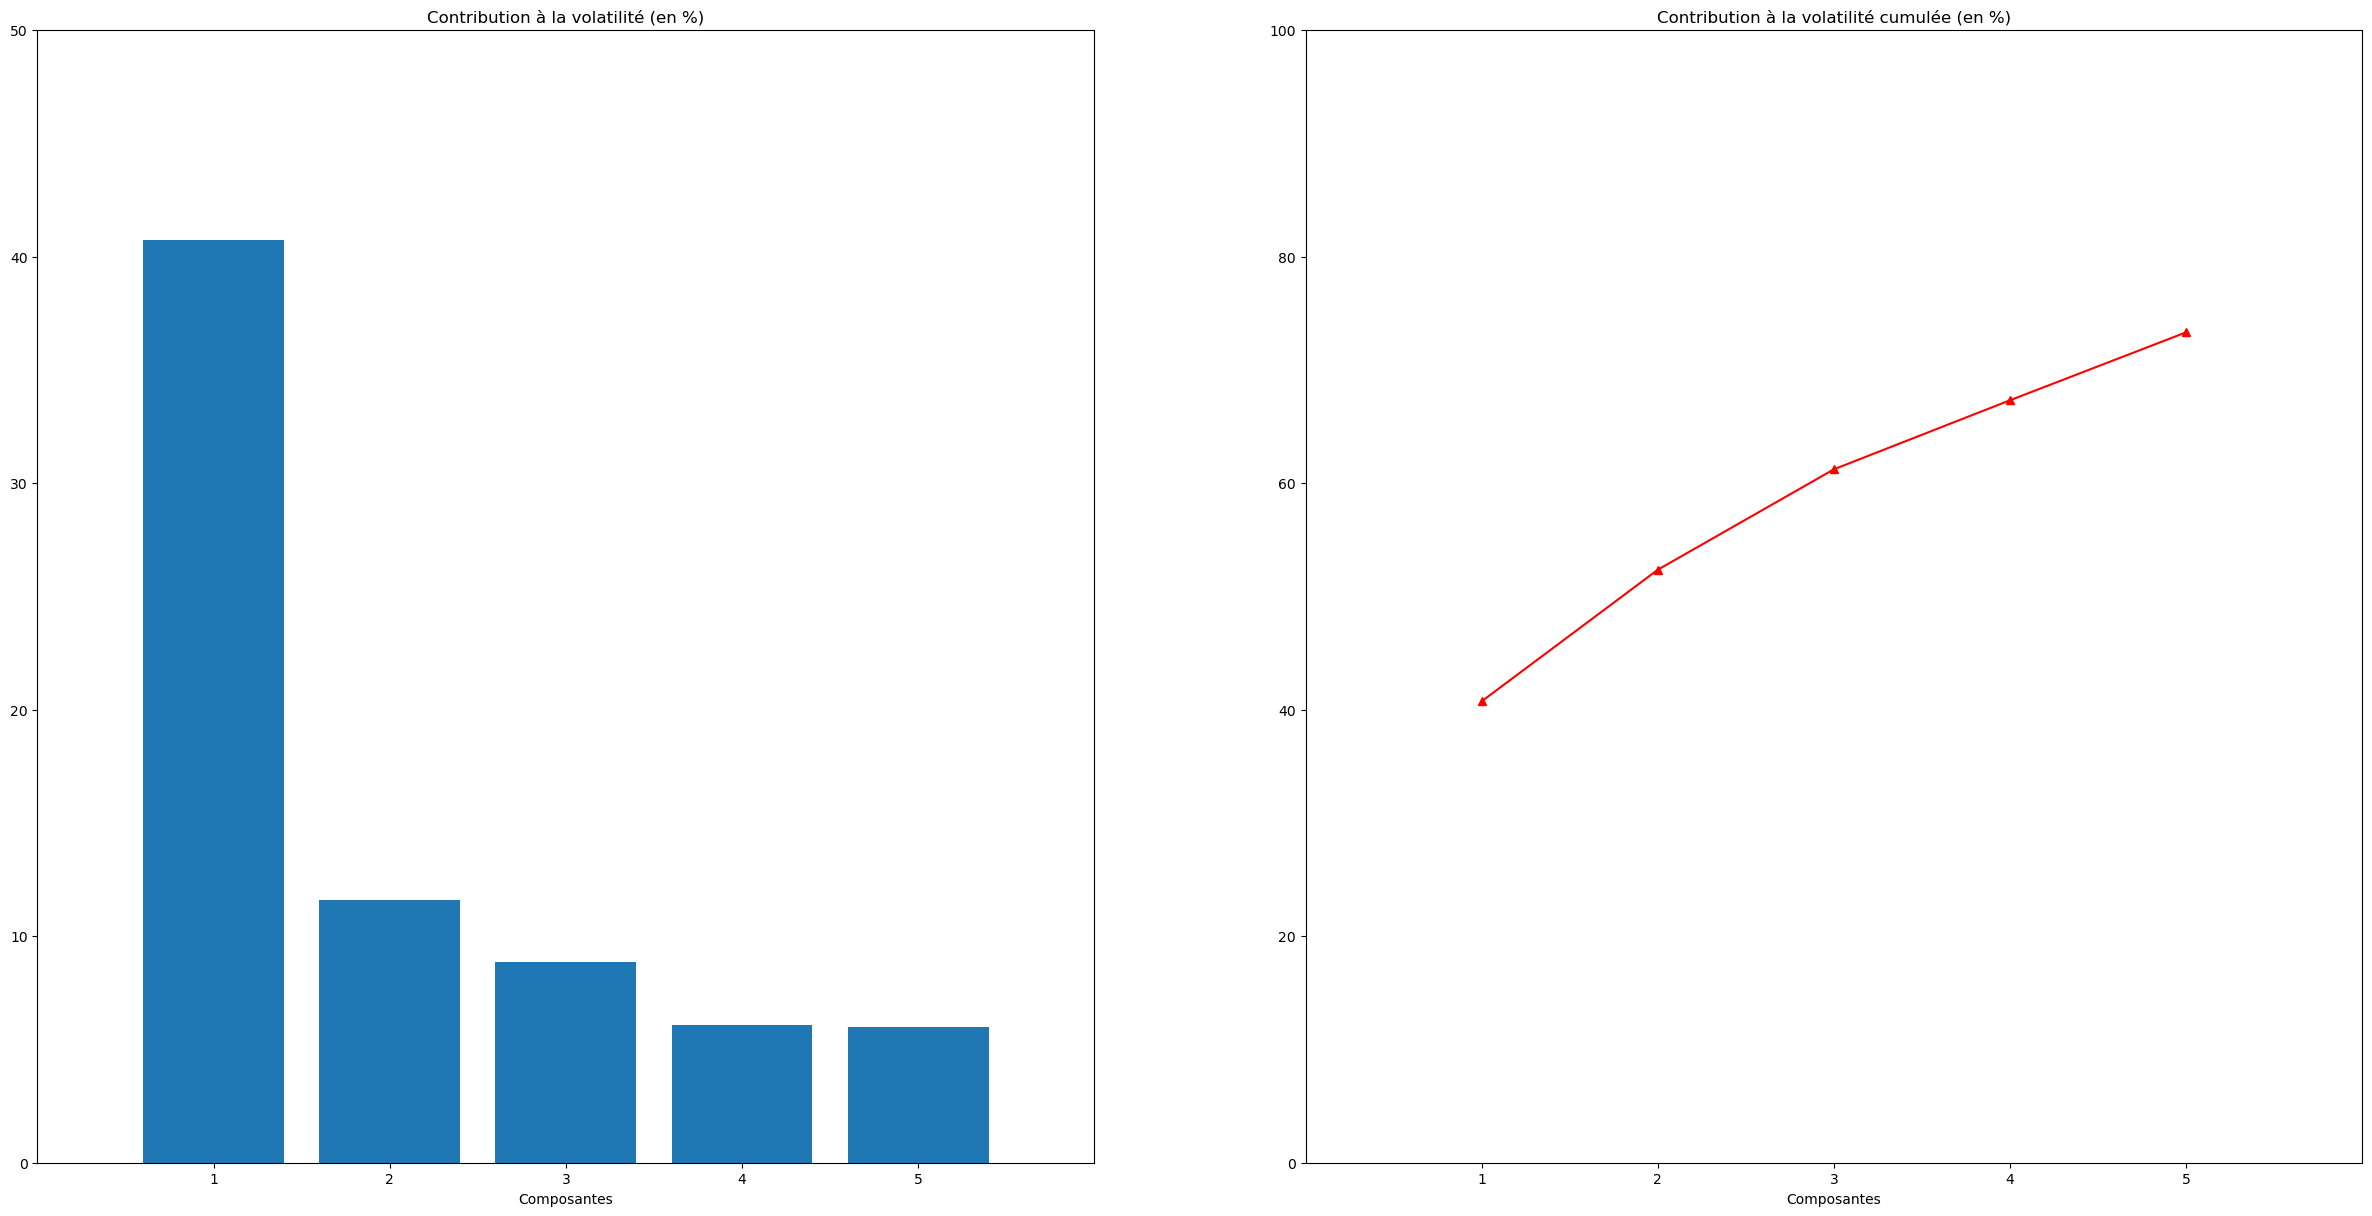

In [47]:
df_portfolio_contributions, pca_components = analysePCA(prices, weights)

Text(0.5, 1.0, 'exposition des titres à la 4e composante')

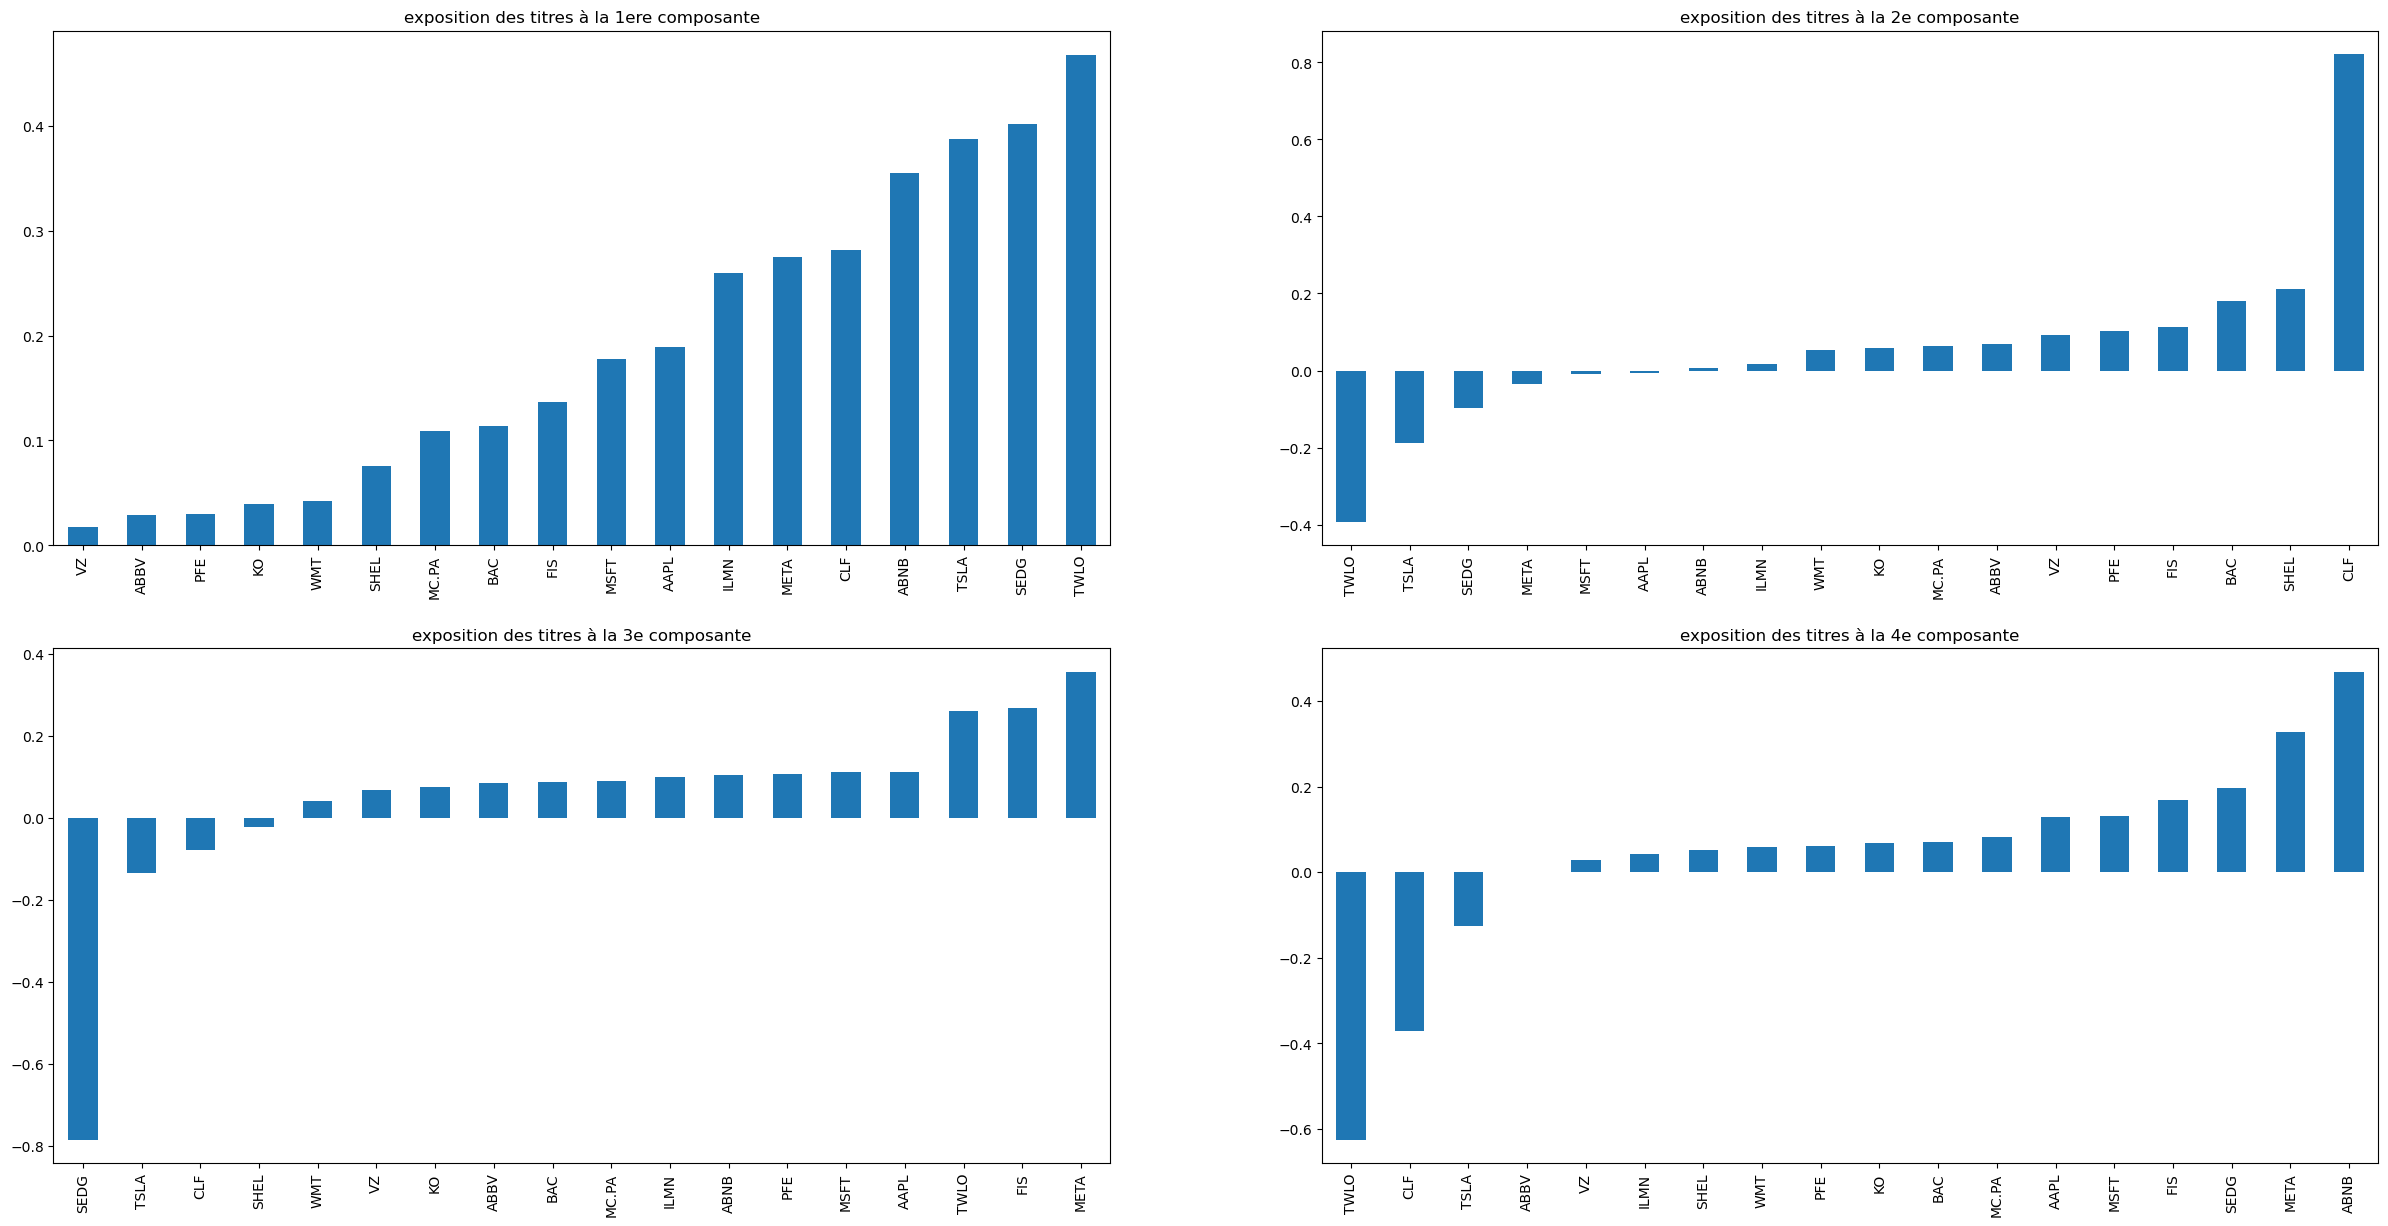

In [48]:
# On met les contributions des titres aux variations du portefeuille sous forme de vecteur
X = np.asarray(df_portfolio_contributions)

# On calcule le produit matriciel des contributions aux variations et la matrice nombre d'axes principaux par nombre de features. Ce qui nous donne la contribution aux variations du portefeuille par composante pour chaque titre
factor_returns = X.dot(pca_components.T)

# La matrice est ensuite mise sous forme de dataframe
factor_returns = pd.DataFrame(
    columns = ["facteur_1", "facteur_2", "facteur_3", "facteur_4", "faceur_5"],
    index = df_portfolio_contributions.index,
    data = factor_returns
    )

factor_returns.head

# On met sous forme de dataframe, l'exposition de chaque titre aux différentes composantes
factor_exposures = pd.DataFrame(
    index= ["facteur_1", "facteur_2", "facteur_3", "facteur_4", "faceur_5"],
    columns = df_portfolio_contributions.columns,
    data = pca_components
).T

# Graph
plt.figure(figsize=(30, 15), dpi=100)
plt.subplot(2,2,1)
factor_exposures.facteur_1.sort_values().plot.bar()
plt.title("exposition des titres à la 1ere composante")
plt.subplot(2,2,2)
factor_exposures.facteur_2.sort_values().plot.bar()
plt.title("exposition des titres à la 2e composante")
plt.subplot(2,2,3)
factor_exposures.facteur_3.sort_values().plot.bar()
plt.title("exposition des titres à la 3e composante")
plt.subplot(2,2,4)
factor_exposures.facteur_4.sort_values().plot.bar()
plt.title("exposition des titres à la 4e composante")

# A noter que bien que l'analyse en composante principale permette d'expliquer les variations de prix des actifs, cette dernière nécessite une compréhension des facteurs affectant les titres pour déterminer la nature des composantes.
# Par exemple la composante 1 semble être le beta, soit la sensibilité des titres au risque systémique (ou risque de marché)

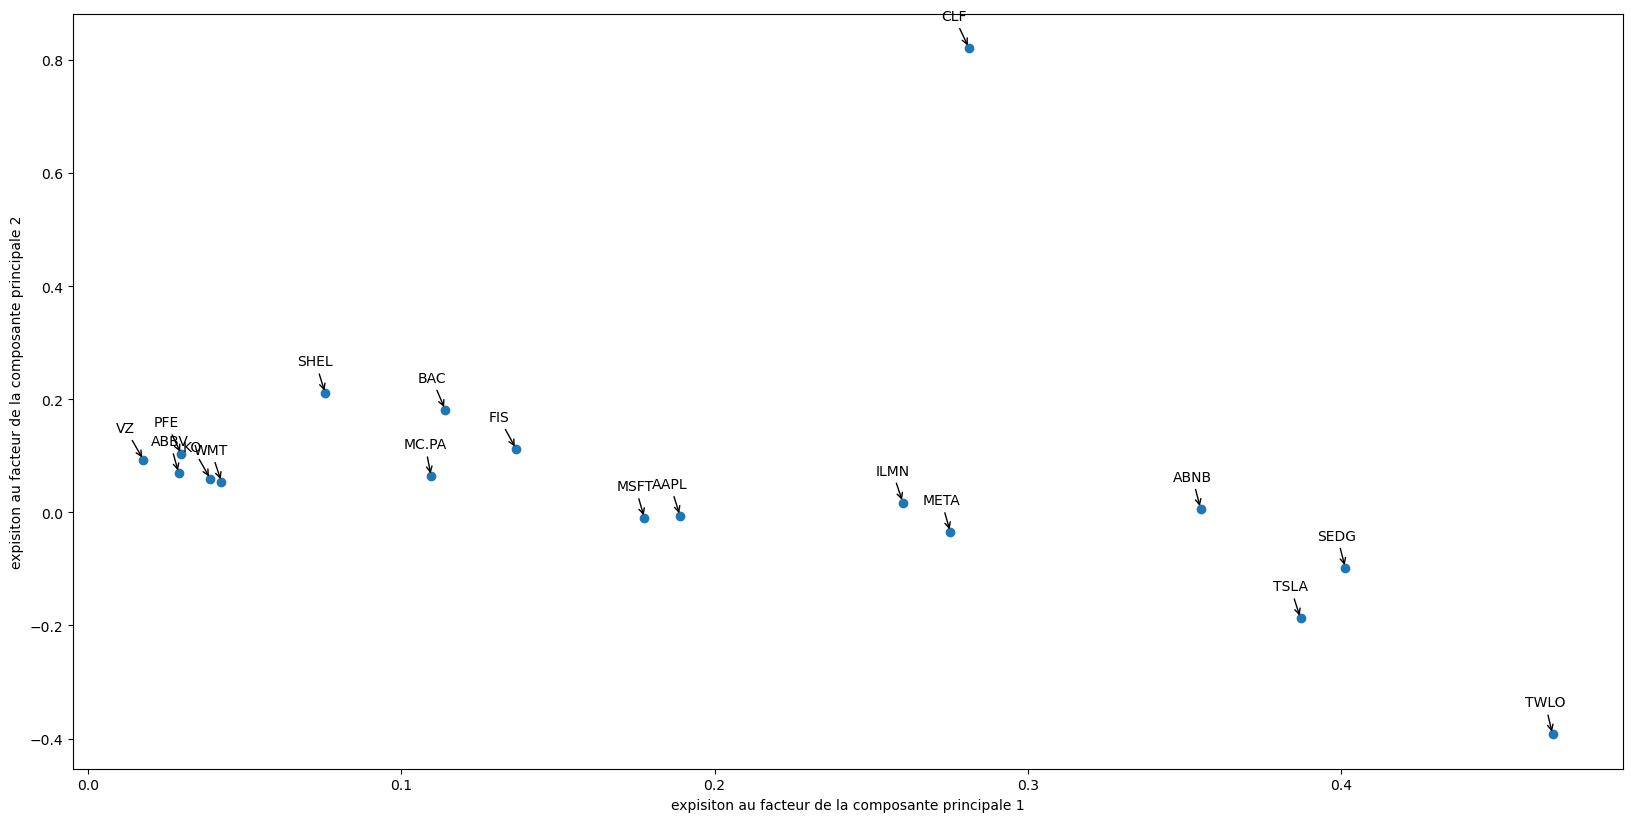

In [49]:
# Graphique de l'exposition des titres par rapport aux deux premières composantes principales
labels = factor_exposures.index
data = factor_exposures.values

plt.figure(figsize=(20, 10), dpi=100)
plt.scatter(data[:,0], data[:, 1])
plt.xlabel("expisiton au facteur de la composante principale 1")
plt.ylabel("expisiton au facteur de la composante principale 2")

for label, x, y in zip(labels, data[:, 0], data [:,1]):
    plt.annotate(
        label,
        xy = (x,y),
        xytext =(-20, 20),
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle = '->',
        connectionstyle = 'arc3,rad= 0')
    );

# On observe des similitudes en Microsoft (MSFT) et Apple (AAPL) mais aussi entre Pfizer (PFE) et AbbVie (ABBV) qui sont deux titres de santé.